In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [21]:
import os

# Create images folder if not exists
os.makedirs("images", exist_ok=True)

In [4]:
df = pd.read_csv('SampleSuperstore.csv', encoding='latin1')  # adjust path if needed
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()
df.describe()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

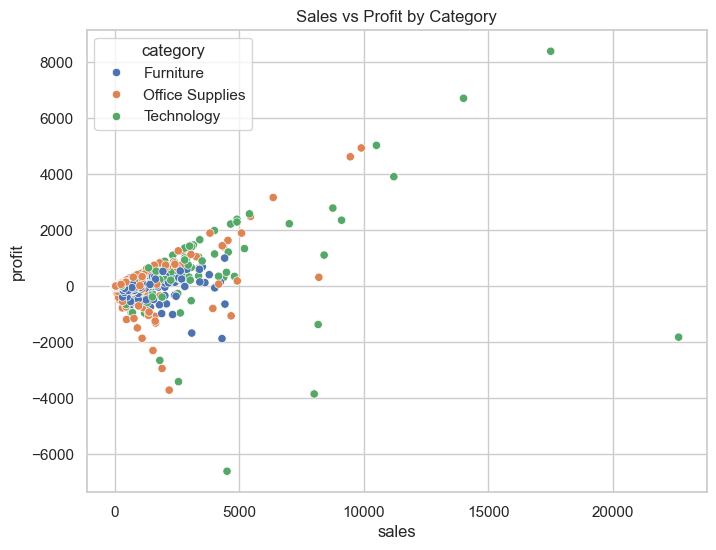

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sales', y='profit', hue='category')
plt.title('Sales vs Profit by Category')
plt.savefig('images/sales_vs_profit_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

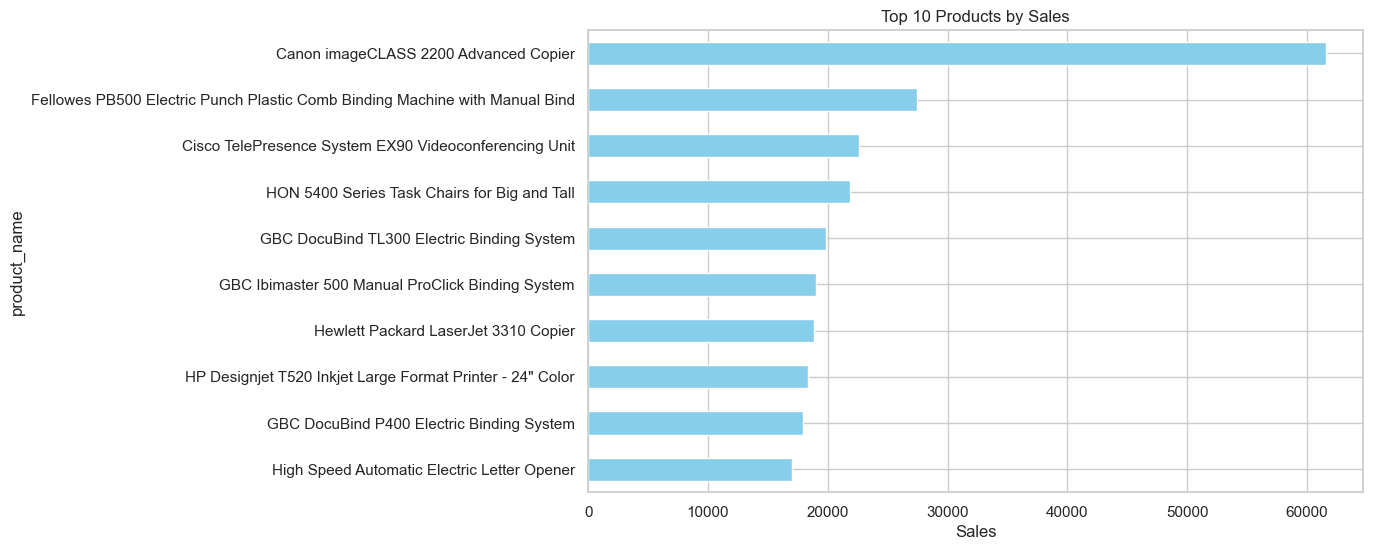

In [23]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.gca().invert_yaxis()
plt.savefig('images/top_10_products_by_sales.png', dpi=300, bbox_inches='tight')
plt.show()

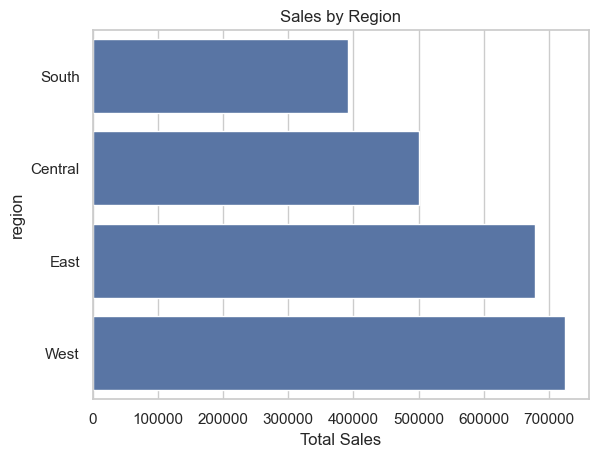

In [24]:
region_sales = df.groupby('region')['sales'].sum().sort_values()
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.savefig('images/sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

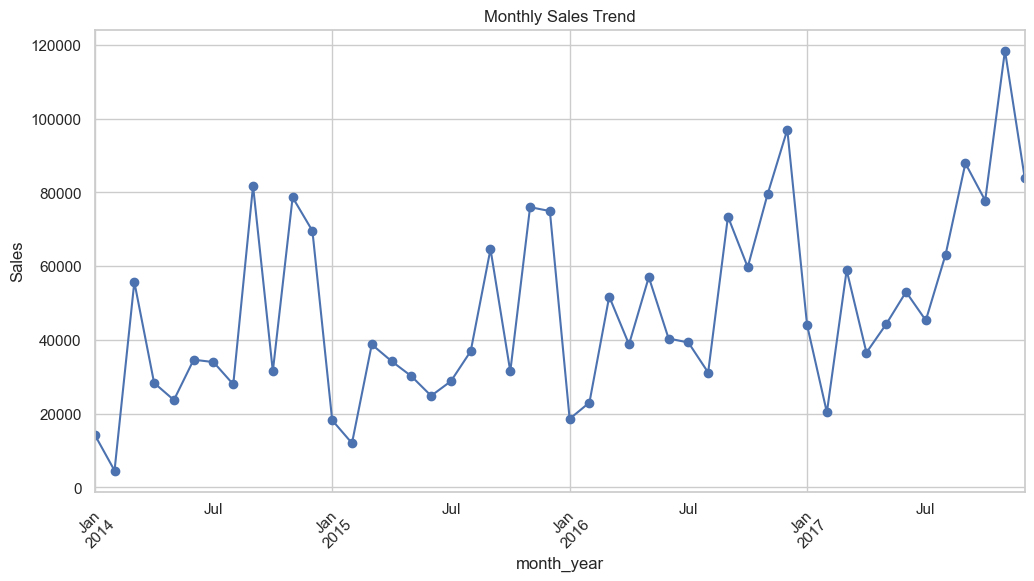

In [25]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=False)
df['month_year'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('month_year')['sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.savefig('images/monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

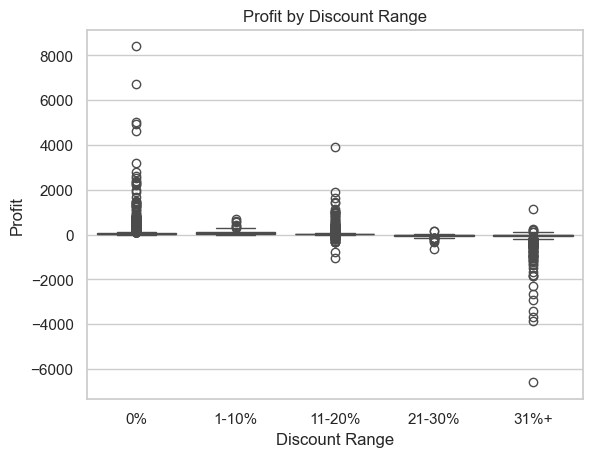

In [26]:
df['discount_range'] = pd.cut(df['discount'], bins=[-0.01, 0, 0.1, 0.2, 0.3, 1],
                              labels=['0%', '1-10%', '11-20%', '21-30%', '31%+'])
sns.boxplot(x='discount_range', y='profit', data=df)
plt.title('Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Profit')
plt.savefig('images/profit_by_discount_range.png', dpi=300, bbox_inches='tight')
plt.show()

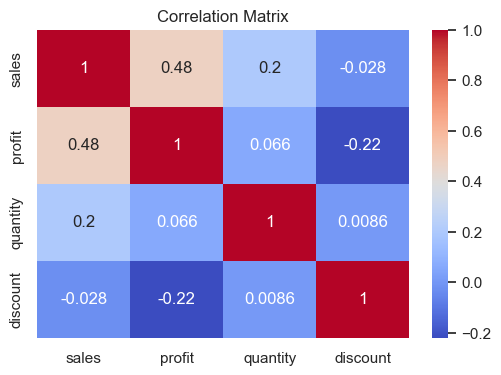

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['sales', 'profit', 'quantity', 'discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
